In [46]:
import networkx as nx 
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import locationtagger


In [47]:
def plot_graph(G, graph_name):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)  # Using spring layout for better visualization
    
    # Draw the nodes and the edges
    nx.draw(G, pos, with_labels=False, node_color='skyblue', edge_color='black', node_size=50, font_size=10)
    
    plt.title(f"{graph_name} Graph")
    plt.show()

In [48]:
# Function to compute and print graph metrics
def compute_graph_metrics(G, graph_name):
    print(f"Metrics for {graph_name}:")
    
    # Number of nodes
    num_nodes = G.number_of_nodes()
    print(f"Number of nodes: {num_nodes}")
    
    # Number of edges
    num_edges = G.number_of_edges()
    print(f"Number of edges: {num_edges}")
    
    # Density
    density = nx.density(G)
    print(f"Density: {density}")
    
    # Degree
    degree_dict = dict(G.degree())
    avg_degree = sum(degree_dict.values()) / num_nodes
    print(f"Average degree: {avg_degree}")
    
    # Clustering coefficient
    if num_nodes > 1:
        clustering_coeff = nx.average_clustering(G)
        print(f"Average clustering coefficient: {clustering_coeff}")
    else:
        print("Average clustering coefficient: N/A (graph is too small)")
    
    # Average shortest path length
    if nx.is_connected(G):
        avg_shortest_path_length = nx.average_shortest_path_length(G)
        print(f"Average shortest path length: {avg_shortest_path_length}")
    else:
        print("Average shortest path length: N/A (graph is not connected)")
    
    print("\n")

In [49]:
def plot_degree_distribution(G, graph_name):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degree_count = pd.Series(degree_sequence).value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    plt.loglog(degree_count.index, degree_count.values, 'b-', marker='o', linestyle='None')
    plt.title(f"Degree Distribution for {graph_name} (Log-Log Scale)")
    plt.ylabel("Frequency")
    plt.xlabel("Degree")
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

# Reading csv

In [50]:
global DATAPATH 
DATAPATH = 'data/in/bipartite_network_tables/'

In [51]:
final_merged = pd.read_csv('data/in/bipartite_network_tables/bipartite_network_data.csv', index_col = [0])

In [52]:
final_merged['date'] = pd.to_datetime(final_merged['date'], format='%Y-%m-%d')

In [53]:
final_merged.head()

,meeting_id,lobbyist_id,identification_code,name,id,cabinet_id,dg_id,date,location,subject,hash,type,source,target
0,1,1,38235121060-73,Dow Europe GmbH,1,NaN,1.0,2022-09-27,Brussels,Physical meeting - Exchange on US and EU strat...,89b8528572e14e0c085796993bd14b13,2.0,1_meeting,1_lobbyist
1,273,1,38235121060-73,Dow Europe GmbH,273,NaN,7.0,2022-02-08,Brussels,Decarbonisation of the chemical sector,357e67efb4f100d578be074114308b00,2.0,273_meeting,1_lobbyist
2,2027,1,38235121060-73,Dow Europe GmbH,2027,NaN,3.0,2019-04-10,"Brussels, Belgium",long term decarbonisation and the increasing r...,8dfe195361671b84bca755074f3cdf27,2.0,2027_meeting,1_lobbyist
3,2730,1,38235121060-73,Dow Europe GmbH,2730,NaN,41.0,2018-04-24,Berlaymont,Industrial Policy,bd392b63bef0b50dc3a4678a334fea46,2.0,2730_meeting,1_lobbyist
4,3140,1,38235121060-73,Dow Europe GmbH,3140,NaN,8.0,2017-09-05,Brussels,EU industrial policy and Circular Economy,60d93912ab761ed045050553cb194682,2.0,3140_meeting,1_lobbyist


# EDA

In [54]:
final_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51543 entries, 0 to 51542
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   meeting_id           51543 non-null  int64         
 1   lobbyist_id          51543 non-null  int64         
 2   identification_code  51543 non-null  object        
 3   name                 51543 non-null  object        
 4   id                   51543 non-null  int64         
 5   cabinet_id           42156 non-null  float64       
 6   dg_id                9387 non-null   float64       
 7   date                 51543 non-null  datetime64[ns]
 8   location             51540 non-null  object        
 9   subject              51543 non-null  object        
 10  hash                 51543 non-null  object        
 11  type                 51538 non-null  float64       
 12  source               51543 non-null  object        
 13  target               51543 non-null 

In [55]:
final_merged.isnull().sum()

meeting_id                 0
lobbyist_id                0
identification_code        0
name                       0
id                         0
cabinet_id              9387
dg_id                  42156
date                       0
location                   3
subject                    0
hash                       0
type                       5
source                     0
target                     0
dtype: int64

In [56]:
final_merged.duplicated().sum()

0

In [57]:
for el in tqdm(final_merged.location.unique()):
    print(el)

  0%|          | 0/1426 [00:00<?, ?it/s]

Brussels
Brussels, Belgium
Berlaymont
Brussels, Director-General's office
BERL 08/304
Amsterdam
Virtual
video-call
Hoek Zeeland
Videoconference
videoconference (Brussels)
Brussels (video conference)
Brussels (videoconference)
videoconference
Online meeting
video conference
Virtual meeting
webex
Ljubljana, Slovenia
Hong Kong
Brussel
London
virtual
video - call
Dublin, Ireland
Spain
Rome, Italy
online meeting
Roma
Davos
Brussels (Berlaymont)
Brussels, Europan Parl (Magritte Group)
Brussels, Berlaymont
Brussels ( Berlaymont)
Berlaymont, Brussels
Online
Brussels - videoconference
Videocall
Video conference
online
virtual meeting
Brussels - video conference
Video-conferencing
Conference call
Gela, Italy
Videconference
BERL 10/411
Bruxelles
Brussels, BERL
Sassenheim
European Commission, Brussels
Virtual Meeting
Video conferencing
Video Conferencing
video-conferencing
Sweden
Brussels (VTC)
Helmond
Portorož
Ljubljana
Lech
Brussels, Belguim
Amsterdam, The Netherlands
BERL 8/26
hybrid meeting
vi

In [60]:
import re
def correct(x):
    check_video = ['onli', 'vide', 'tele', 'skype', 'teams', 'virtual', 'webex', 'digital', 'phone', 'call']
    check_brussels = ['Bruxelles','brussel', 'ryssels', 'berl', 'berlyamont', 'bxl']
    eu_states = ["austria", "belgium", "bulgaria", "croatia", "cyprus", "czech republic", "denmark", "estonia", "finland", "france", "germany", "greece", "hungary", "ireland", "italy", "latvia", "lithuania", "luxembourg", "malta", "netherlands", "poland", "portugal", "romania", "slovakia", "slovenia", "spain", "sweden"]
    if type(x) != float and x is not None:
        # Check if any word in the list 'check' is present in the string 'x'
        if any(w in x.lower().strip() for w in check_video):
            x = "online"
        elif any(w in x.lower().strip() for w in check_brussels):
            x = "brussels"
        elif any(w in x.lower().strip() for w in ['office']):
            x = "office"
        elif any(w in x.lower().strip() for w in ['hybrid', '+']):
            x = "hybrid"
        else:
            for w in eu_states:
                if w in x.lower().strip():
                    if ',' in x:
                        x = re.sub(r'[^\w\s]', '', x.lower().strip().replace(w, ''))
    pbar.update(1)
    return x

with tqdm(total=len(final_merged)) as pbar:    
    final_merged['location'] = final_merged['location'].apply(lambda x: correct(x))

  0%|          | 0/51543 [00:00<?, ?it/s]

In [66]:
def locationtag(x):
    entities = locationtagger.find_locations(text = re.sub(r'[^\w\s]', '', x.lower().strip()))
    pbar.update(1)
    try:
        return entities.cities[0]
    except:
        return x
        
with tqdm(total=len(final_merged)) as pbar:    
    final_merged['location'] = final_merged['location'].apply(lambda x: locationtag(x))

  0%|          | 0/51543 [00:00<?, ?it/s]

In [ ]:
for el in tqdm(final_merged.location.unique()):
    print(el)

  0%|          | 0/702 [00:00<?, ?it/s]

brussels
Amsterdam
online
Hoek Zeeland
ljubljana 
Hong Kong
London
dublin 
Spain
rome 
Roma
Davos
gela 
Bruxelles
Sassenheim
Sweden
Helmond
Portorož
Ljubljana
Lech
amsterdam the 
hybrid
Tokyo
office
VTC
VC meeting
On line
Florence
Singapore
Nyon, Switzerland
Helsinki
Bucharest
New York
london
London (UK)
London, UK
Aix-en-Provence
Brussles
valladolid 
Wolfsburg
Strasbourg
Stuttgart
Davos, Switzerland
Prague
New Delhi, India
Paris
Rome
Bratislava
Algiers
European Commission
nicosia 
Algiers, Algeria
Houston, U.S.A.
Washington DC
Hannover, DE
Warsaw
Meet and Meat
Santiago de Copostela (Eurofi)
Hamburg
Dresden
1 Rue Zinner
Zoom meeting
Av. De Cortenbergh 168
BusinessEurope headquarters
BUSINESSEUROPE
sofia 
Stockholm
Madrid
EU COMPETITIVENESS
bucharest 
Frankfurt
bonn 
Barcelona
Ireland
EU premises
Commissioner's meeting room
San Francisco
Confindustria
bruxelles 
Roma (IT)
madrid 
Juelich
Kiel
Copenhagen
helsinki 
copenhagen 
Representation to the EU of the Association of German Chambers

# Creating the bipartite network

In [22]:
# Create a new graph
B = nx.Graph()

# Add nodes with the bipartite attribute
# The 'meetings' nodes will be part of one set
meetings = final_merged['source'].unique()
lobbyists = final_merged['target'].unique()

B.add_nodes_from(meetings, bipartite=0)  # Add source nodes with bipartite=0
B.add_nodes_from(lobbyists, bipartite=1)  # Add target nodes with bipartite=1

# Add edges between source and target
edges = list(zip(final_merged['source'], final_merged['target']))
B.add_edges_from(edges)

In [23]:
B

In [24]:
len(edges)

51543

In [25]:
B.number_of_nodes()

47965

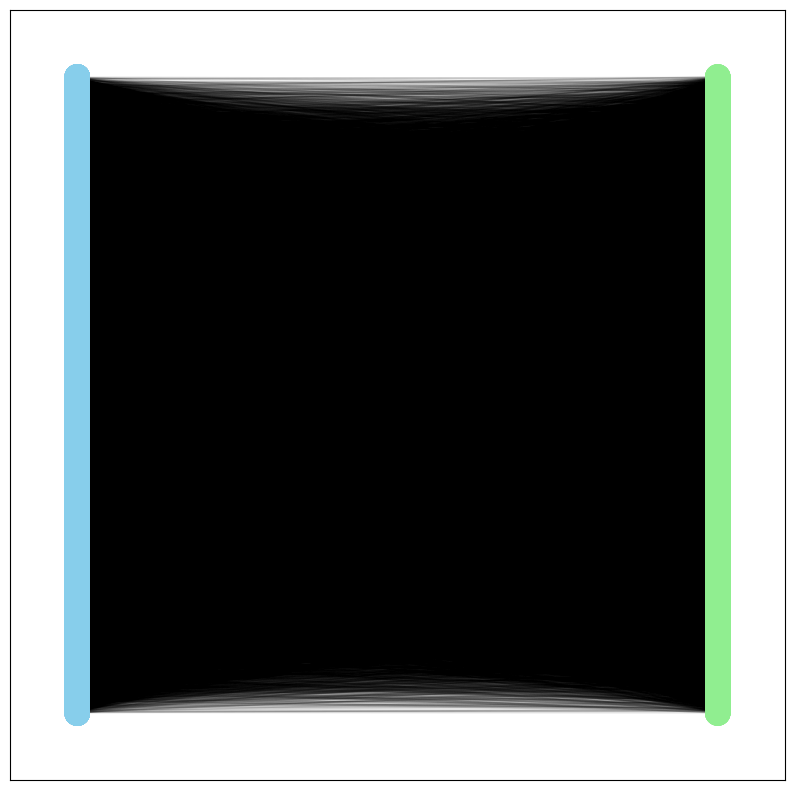

In [26]:
import matplotlib.pyplot as plt

# Draw the bipartite graph
plt.figure(figsize=(10, 10))

# Position nodes using bipartite_layout
pos = nx.bipartite_layout(B, meetings)

nx.draw_networkx_nodes(B, pos, node_color=['skyblue' if n in meetings else 'lightgreen' for n in B.nodes()])
nx.draw_networkx_edges(B, pos=pos, edgelist=B.edges(), alpha=0.1, width=1)
plt.show()

In [27]:
from networkx.algorithms import bipartite
# Create the projections
meetings_projection = bipartite.projected_graph(B, final_merged['source'])
lobbyists_projection = bipartite.projected_graph(B, final_merged['target'])

In [28]:


# Compute metrics for source and target projections
compute_graph_metrics(meetings_projection, "Meetings Projection")
compute_graph_metrics(lobbyists_projection, "Lobbyists Projection")

Metrics for Meetings Projection:
Number of nodes: 40105
Number of edges: 1255092
Density: 0.0015606996923321643
Average degree: 62.59030046128912
Average clustering coefficient: 0.8625324407705477
Average shortest path length: N/A (graph is not connected)


Metrics for Lobbyists Projection:
Number of nodes: 7860
Number of edges: 27624
Density: 0.0008943895703763566
Average degree: 7.029007633587787
Average clustering coefficient: 0.31629544178063435
Average shortest path length: N/A (graph is not connected)




In [29]:
# Step 1: Identify nodes with degree zero
nodes_with_degree_zero = [node for node, degree in dict(meetings_projection.degree()).items() if degree == 0]

# Step 2: Create a subgraph excluding nodes with degree zero
graph_without_zero_degree = meetings_projection.copy()
graph_without_zero_degree.remove_nodes_from(nodes_with_degree_zero)

# Step 3: Compute the connected components
connected_components = list(nx.connected_components(graph_without_zero_degree))

# Step 4: Sort the connected components by size (from largest to smallest)
connected_components_sorted = sorted(connected_components, key=len, reverse=True)

# Output the results
num_components = len(connected_components_sorted)
components_sizes = [len(component) for component in connected_components_sorted]
num_nodes_with_degree_zero = len(nodes_with_degree_zero)

# Print the results
print(f"Number of connected components (excluding zero-degree nodes): {num_components}")
print("Sizes of connected components (from largest to smallest):")
print(components_sizes)
print(f"Number of nodes with degree zero: {num_nodes_with_degree_zero}")

Number of connected components (excluding zero-degree nodes): 1576
Sizes of connected components (from largest to smallest):
[31304, 50, 44, 34, 30, 30, 30, 29, 28, 28, 26, 26, 25, 25, 24, 23, 23, 22, 21, 21, 21, 20, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

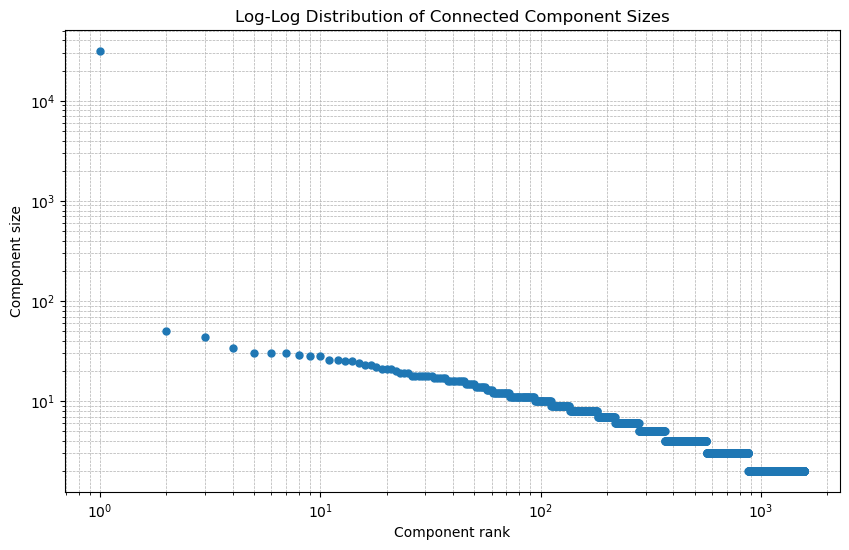

In [30]:
# Plot the semi-log distribution
plt.figure(figsize=(10, 6))
plt.loglog(range(1, len(components_sizes) + 1), components_sizes, 'o', markersize=5, label='Component sizes')
plt.title('Log-Log Distribution of Connected Component Sizes')
plt.xlabel('Component rank')
plt.ylabel('Component size')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

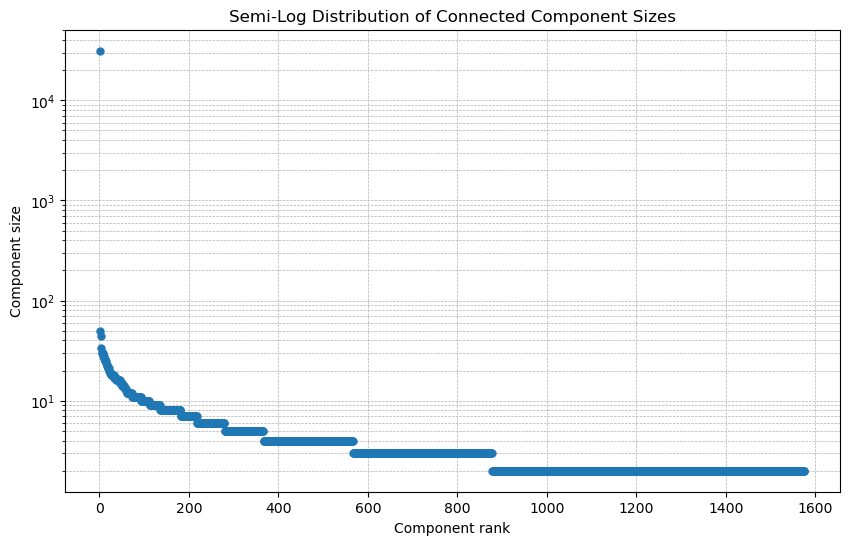

In [31]:
# Plot the semi-log distribution
plt.figure(figsize=(10, 6))
plt.semilogy(range(1, len(components_sizes) + 1), components_sizes, 'o', markersize=5, label='Component sizes')
plt.title('Semi-Log Distribution of Connected Component Sizes')
plt.xlabel('Component rank')
plt.ylabel('Component size')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

C:\Users\valen\AppData\Local\Temp\ipykernel_29388\3582071870.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog(degree_count.index, degree_count.values, 'b-', marker='o', linestyle='None')


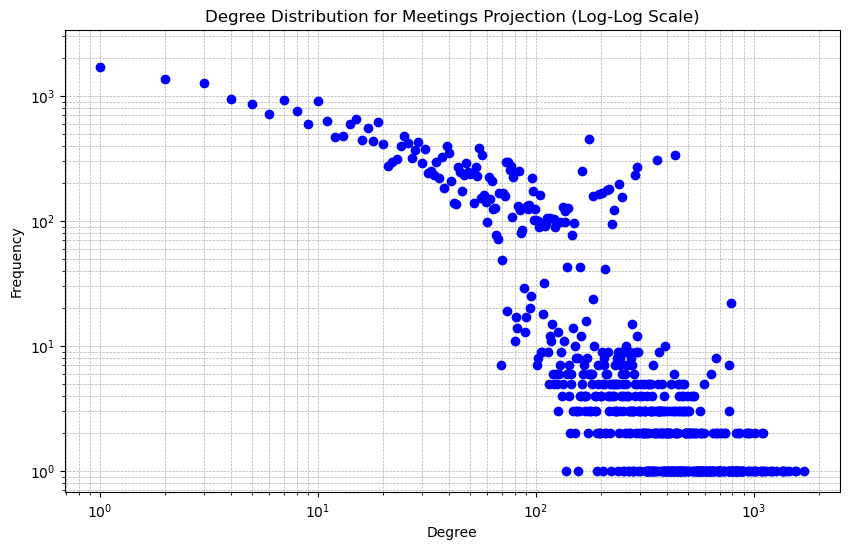

In [33]:
# Plot degree distributions for source and target projections
plot_degree_distribution(meetings_projection, "Meetings Projection")

C:\Users\valen\AppData\Local\Temp\ipykernel_29388\3582071870.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog(degree_count.index, degree_count.values, 'b-', marker='o', linestyle='None')


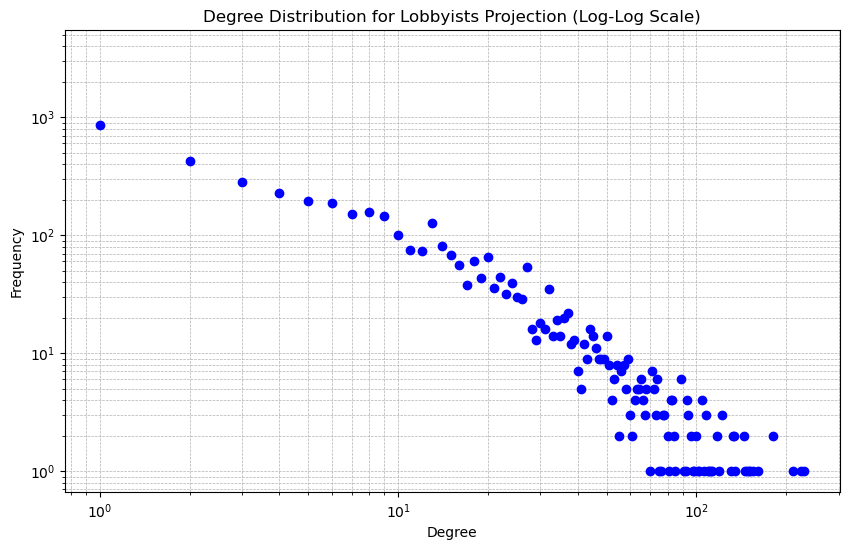

In [34]:
plot_degree_distribution(lobbyists_projection, "Lobbyists Projection")

In [37]:
# Step 1: Identify nodes with degree zero
nodes_with_degree_zero = [node for node, degree in dict(lobbyists_projection.degree()).items() if degree == 0]

# Step 2: Create a subgraph excluding nodes with degree zero
graph_without_zero_degree = lobbyists_projection.copy()
graph_without_zero_degree.remove_nodes_from(nodes_with_degree_zero)

# Step 3: Compute the connected components
connected_components = list(nx.connected_components(graph_without_zero_degree))

# Step 4: Sort the connected components by size (from largest to smallest)
connected_components_sorted = sorted(connected_components, key=len, reverse=True)

# Output the results
num_components = len(connected_components_sorted)
components_sizes = [len(component) for component in connected_components_sorted]
num_nodes_with_degree_zero = len(nodes_with_degree_zero)

# Print the results
print(f"Number of connected components (excluding zero-degree nodes): {num_components}")
print("Sizes of connected components (from largest to smallest):")
print(components_sizes)
print(f"Number of nodes with degree zero: {num_nodes_with_degree_zero}")

Number of connected components (excluding zero-degree nodes): 218
Sizes of connected components (from largest to smallest):
[3651, 19, 14, 10, 9, 7, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Number of nodes with degree zero: 3643


In [44]:
# # Get the giant connected component
giant_cc = max(nx.connected_components(meetings_projection), key=len)

# # Create a subgraph containing only the giant connected component
gcc_subgraph = meetings_projection.subgraph(giant_cc)

# # Draw the subgraph
# plt.figure(figsize=(10, 10))
# nx.draw(gcc_subgraph, node_color='skyblue', edge_color='gray', node_size=50, font_size=10)
# plt.title("Giant Connected Component of Meetings Projected Graph")
# plt.show()

In [45]:
gcc_subgraph.number_of_nodes()

31304

C:\Users\valen\AppData\Local\Temp\ipykernel_29388\3582071870.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog(degree_count.index, degree_count.values, 'b-', marker='o', linestyle='None')


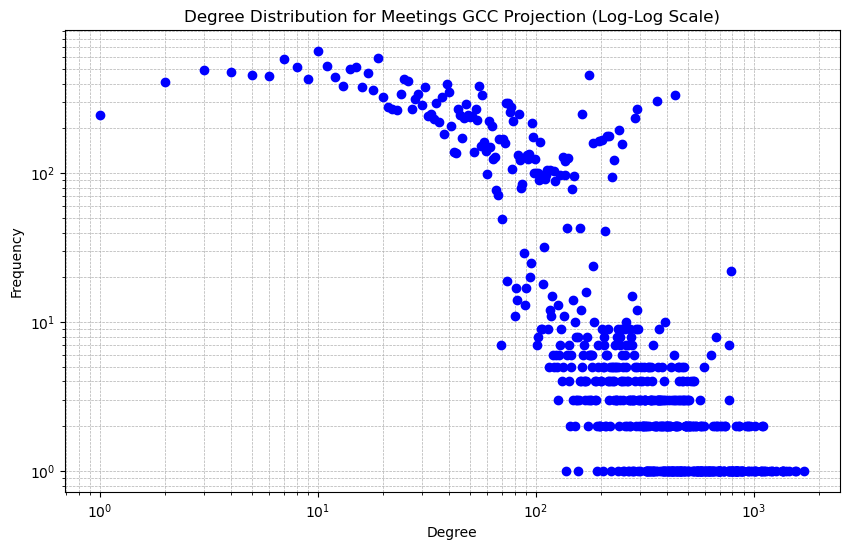

In [39]:
plot_degree_distribution(gcc_subgraph, "Meetings GCC Projection")

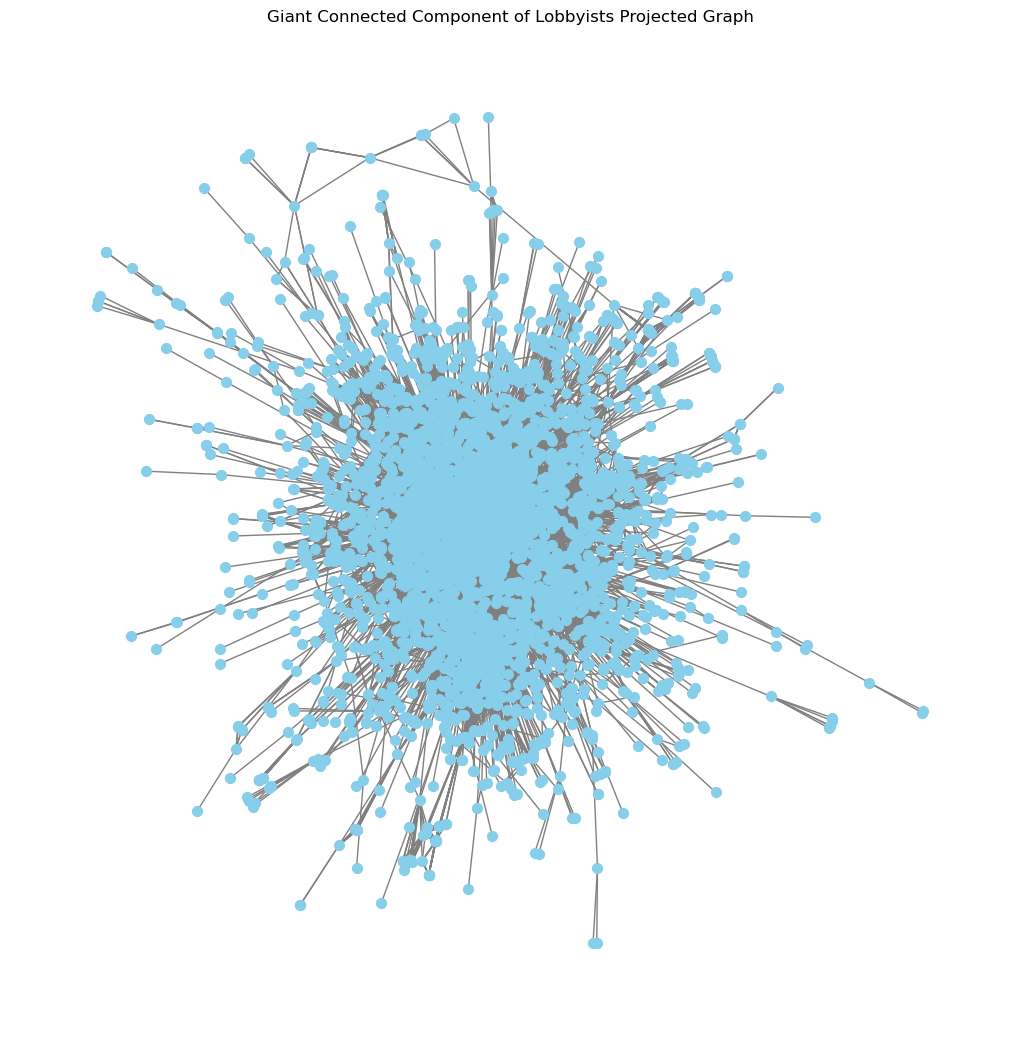

In [41]:
# Get the giant connected component
giant_cc = max(nx.connected_components(lobbyists_projection), key=len)

# Create a subgraph containing only the giant connected component
gcc_subgraph = lobbyists_projection.subgraph(giant_cc)

# Draw the subgraph
plt.figure(figsize=(10, 10))
nx.draw(gcc_subgraph, node_color='skyblue', edge_color='gray', node_size=50, font_size=10)
plt.title("Giant Connected Component of Lobbyists Projected Graph")
plt.show()

C:\Users\valen\AppData\Local\Temp\ipykernel_29388\3582071870.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog(degree_count.index, degree_count.values, 'b-', marker='o', linestyle='None')


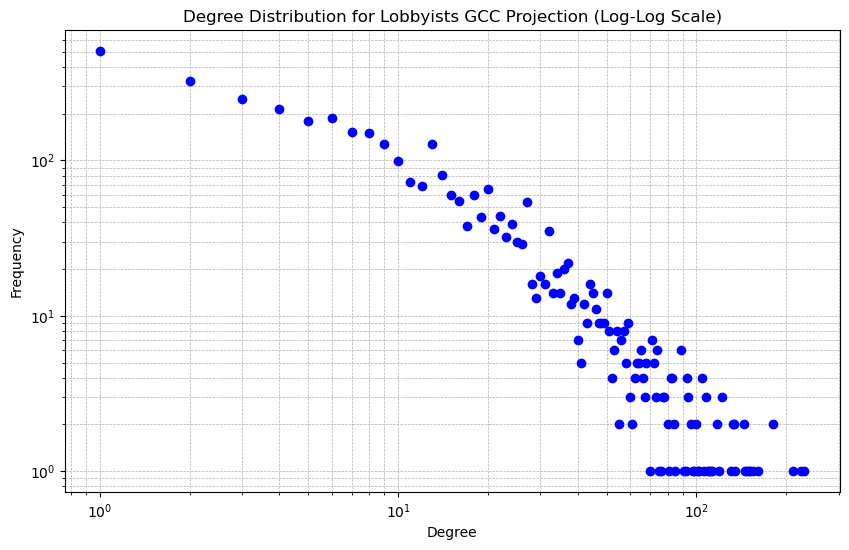

In [42]:
plot_degree_distribution(gcc_subgraph, "Lobbyists GCC Projection")